1. Business Problem Understanding

The project aims to predict wheather a loan will be approved or not based on customer attributes. This is a binary classification problem with the target variable belong to 'Loan_Status'(values like 'Approved' or 'Not Approved').This predection will be help financial institutions assess the risk associated with leading money to indivisual or business,there by enabiling better decision_making

2. Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\SENAPATI SIR FSDS NOTE\OCTOBER MONTH DS NOTE\15th- NAIVE BAYES\15th- NAIVE BAYES\LOAN APPROVAL PREDICTION\test_case\Loan_Data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.shape

(614, 13)

In [5]:
df.ndim

2

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df['Loan_ID']

0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object

In [9]:
df['Loan_ID'].nunique()

614

In [10]:
df['ApplicantIncome']

0      5849
1      4583
2      3000
3      2583
4      6000
       ... 
609    2900
610    4106
611    8072
612    7583
613    4583
Name: ApplicantIncome, Length: 614, dtype: int64

In [11]:
df.drop(columns=['Loan_ID'],inplace= True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
df['Gender']

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [13]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [14]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [15]:
#df['Gender'].values

In [16]:
df[df['Gender'] =='Male']

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
607,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [17]:
df[df['Gender'] =='Female']

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
17,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
29,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
37,Female,Yes,0,Graduate,No,3667,1459.0,144.0,360.0,1.0,Semiurban,Y
45,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
48,Female,Yes,0,Graduate,No,2645,3440.0,120.0,360.0,0.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...
587,Female,No,0,Not Graduate,No,2165,0.0,70.0,360.0,1.0,Semiurban,Y
600,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
604,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y


In [18]:
df['Married']

0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object

In [19]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [20]:
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [21]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [22]:
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [23]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [24]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [25]:
df['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [26]:
df['ApplicantIncome'].value_counts()

ApplicantIncome
2500     9
2600     6
4583     6
6000     6
5000     5
        ..
11500    1
2708     1
2132     1
3366     1
1299     1
Name: count, Length: 505, dtype: int64

In [27]:
df['CoapplicantIncome'].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [28]:
df['CoapplicantIncome'].value_counts()

CoapplicantIncome
0.0       273
1666.0      5
2500.0      5
2083.0      5
5625.0      3
         ... 
2302.0      1
997.0       1
3541.0      1
3263.0      1
4301.0      1
Name: count, Length: 287, dtype: int64

In [29]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [30]:
df['LoanAmount'].value_counts()

LoanAmount
120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
292.0     1
142.0     1
350.0     1
496.0     1
253.0     1
Name: count, Length: 203, dtype: int64

In [31]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [32]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [33]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [34]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [35]:
df['Credit_History'] = df['Credit_History'].replace({1:'good',0:'bad'})

In [36]:
df['Credit_History'].unique()

array(['good', 'bad', nan], dtype=object)

In [37]:
df['Credit_History'].value_counts()

Credit_History
good    475
bad      89
Name: count, dtype: int64

In [38]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [39]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [40]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [41]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [42]:
# int or float
continuous = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
discrete_categorical = ['Gender','Married','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
discreate_count = ['Dependents','Loan_Amount_Term']

Exploratory Data Analysis\(EDA)

In [43]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,good,Urban,Y


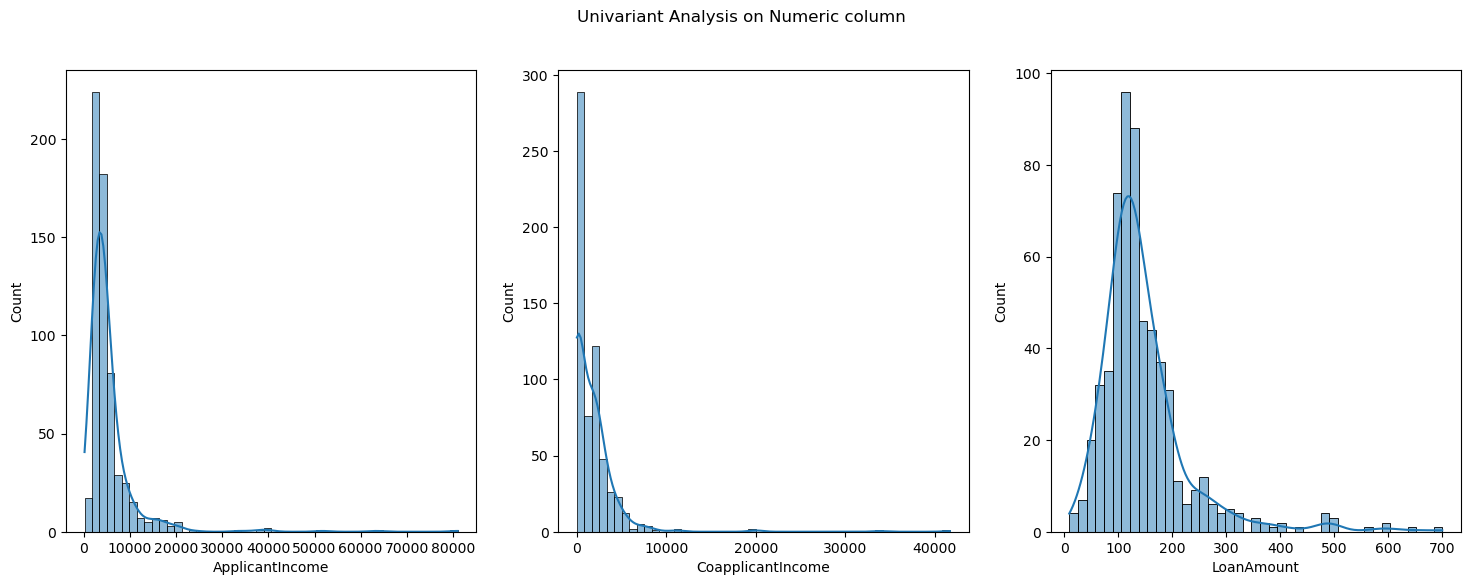

In [44]:
plt.rcParams['figure.figsize'] = (18,6)

plt.subplot(1,3,1)
# Total 3 subplots so 1 = row, 3 = column, 1 = plot no 1
sns.histplot(df['ApplicantIncome'],kde= True) 

plt.subplot(1,3,2)
sns.histplot(df['CoapplicantIncome'],kde= True)

plt.subplot(1,3,3)
sns.histplot(df['LoanAmount'],kde=True)

plt.suptitle('Univariant Analysis on Numeric column')
plt.show()


In [45]:
df[continuous]

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0
...,...,...,...
609,2900,0.0,71.0
610,4106,0.0,40.0
611,8072,240.0,253.0
612,7583,0.0,187.0


In [46]:
df[continuous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


In [47]:
df[continuous].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

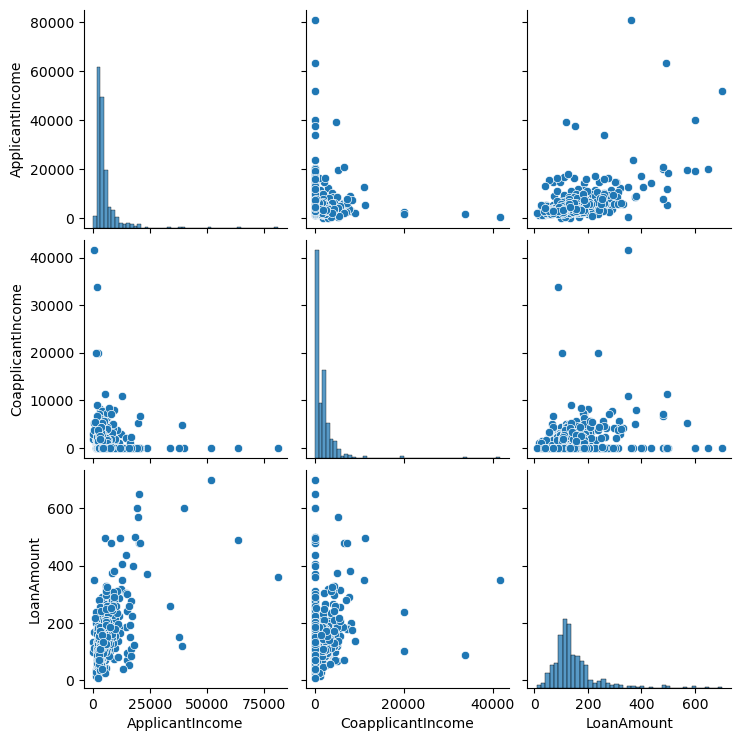

In [48]:
sns.pairplot(df[continuous])

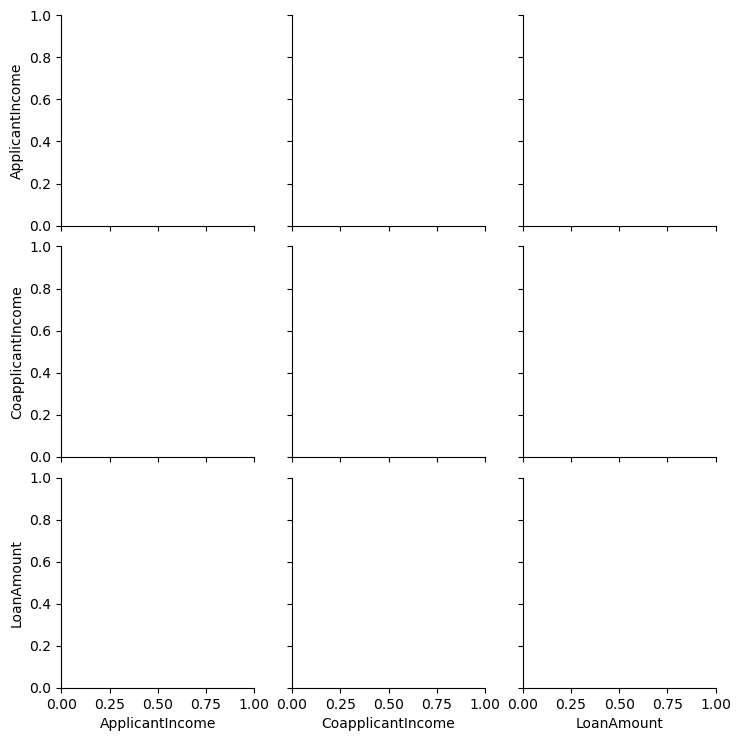

In [49]:
sns.PairGrid(df[continuous])

<Axes: >

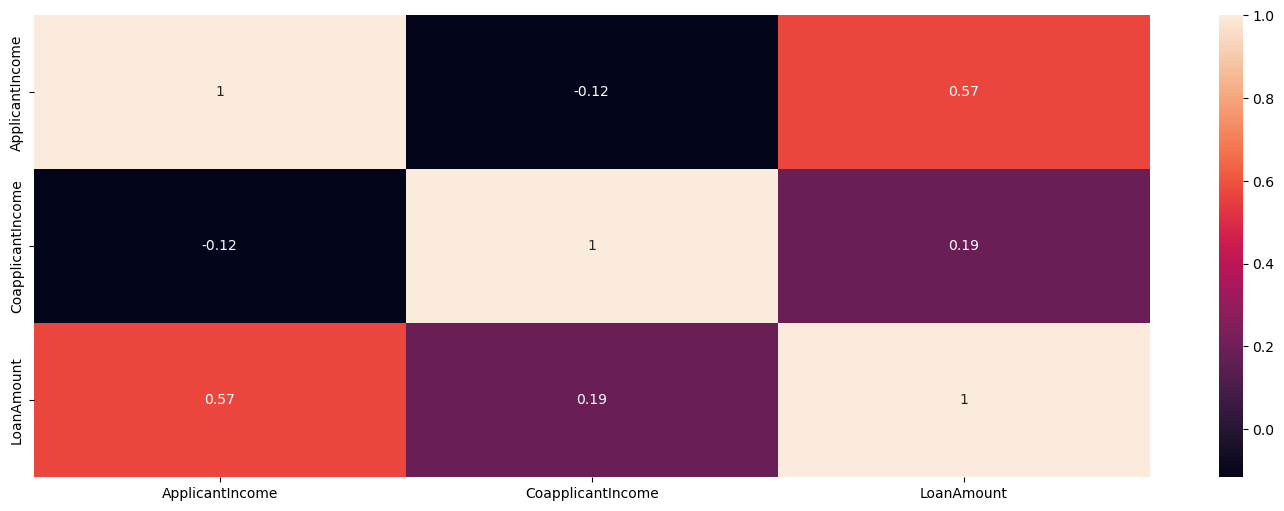

In [50]:
sns.heatmap(df[continuous].corr(),annot= True)

In [51]:
df[discrete_categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


Text(0.5, 0.98, 'Univariant analysis of caterogial columns')

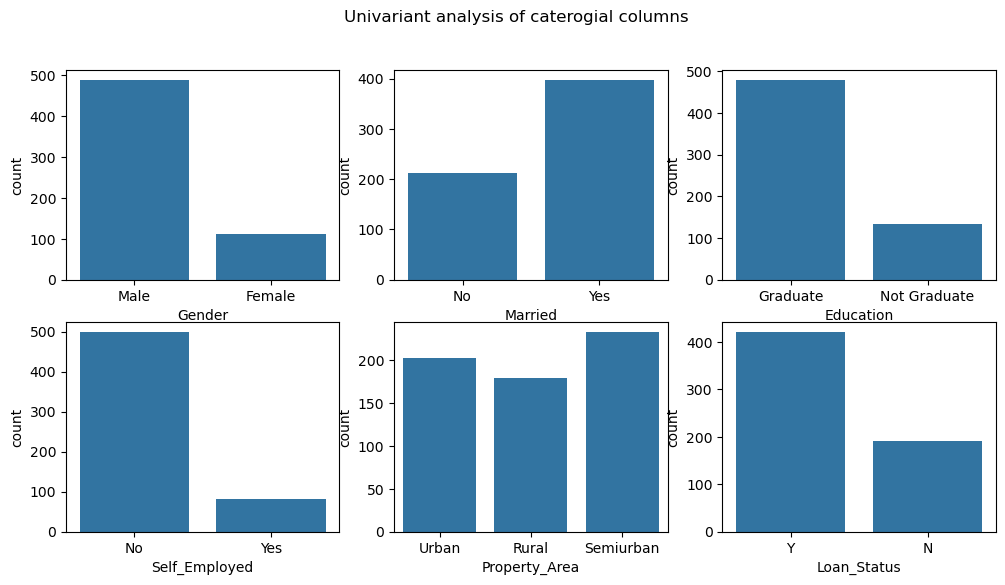

In [52]:
plt.rcParams['figure.figsize'] = (12,6)

plt.subplot(2,3,1)
sns.countplot(x = 'Gender',data=df)

plt.subplot(2,3,2)
sns.countplot(x = 'Married',data= df)

plt.subplot(2,3,3)
sns.countplot(data=df,x = 'Education')

plt.subplot(2,3,4)
sns.countplot(data=df,x = 'Self_Employed')

plt.subplot(2,3,5)
sns.countplot(data=df,x = 'Property_Area')

plt.subplot(2,3,6)
sns.countplot(data=df,x = 'Loan_Status')

plt.suptitle('Univariant analysis of caterogial columns')


Text(0.5, 0.98, 'Outlayers in the data')

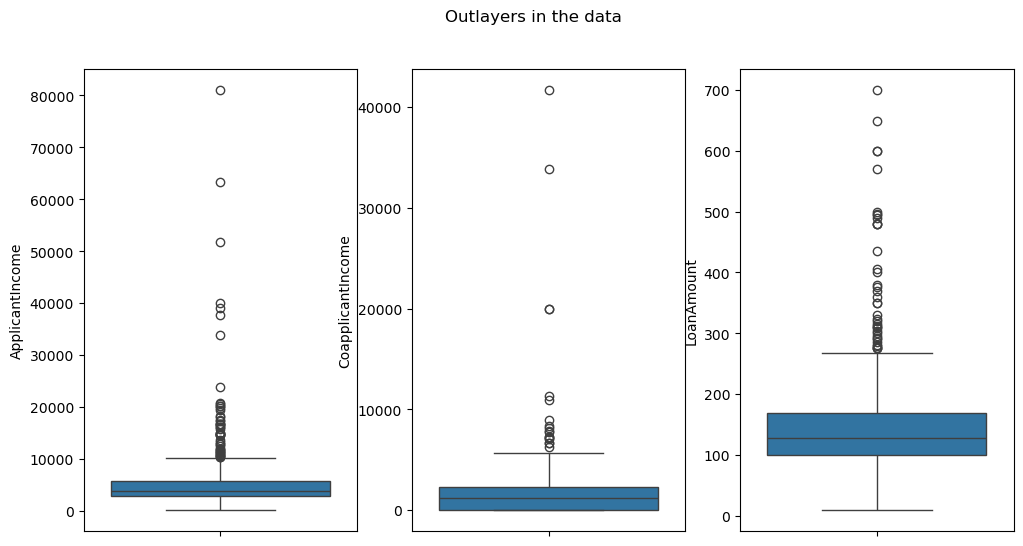

In [53]:
# outlayer
plt.subplot(1,3,1)
sns.boxplot(df['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(df['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(df['LoanAmount'])

plt.suptitle('Outlayers in the data')


Text(0.5, 0.98, 'Outlayers in the data')

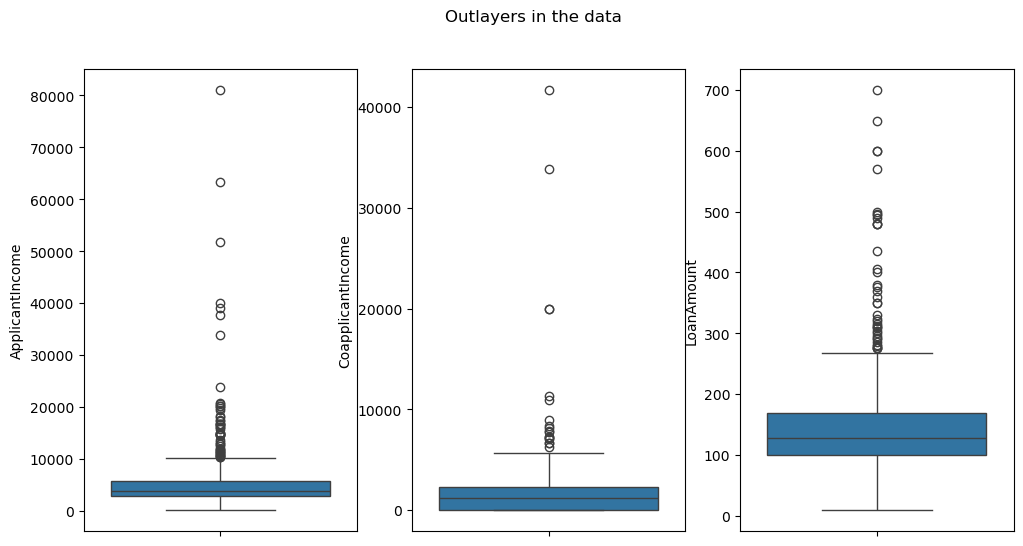

In [54]:
# outlayer
plt.subplot(1,3,1)
sns.boxplot(df['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(df['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(df['LoanAmount'])

plt.suptitle('Outlayers in the data')


In [55]:
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,good,Urban,Y


Text(0.5, 0.98, 'Outlayers in the data')

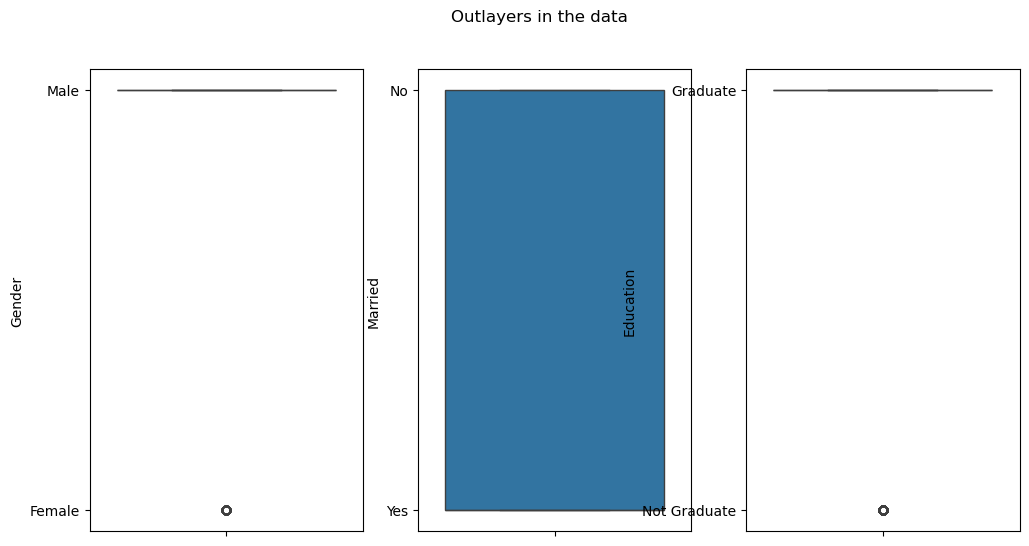

In [56]:
# outlayer
plt.subplot(1,3,1)
sns.boxplot(df['Gender'])

plt.subplot(1,3,2)
sns.boxplot(df['Married'])

plt.subplot(1,3,3)
sns.boxplot(df['Education'])

plt.suptitle('Outlayers in the data')


Data Preparation

In [57]:
df['Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace= True)

In [58]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,Male,No,0,Graduate,No,NaN,360.0,good,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,good,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,good,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,good,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,good,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360.0,good,Rural,Y,2900.0
610,Male,Yes,3+,Graduate,No,40.0,180.0,good,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,253.0,360.0,good,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,187.0,360.0,good,Urban,Y,7583.0


In [59]:
df['Dependents'] = df['Dependents'].replace({'3+':3})
df
df['Education'] = df['Education'].replace({'Not Graduate':'Non graduate'})
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,Male,No,0,Graduate,No,NaN,360.0,good,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,good,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,good,Urban,Y,3000.0
3,Male,Yes,0,Non graduate,No,120.0,360.0,good,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,good,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360.0,good,Rural,Y,2900.0
610,Male,Yes,3,Graduate,No,40.0,180.0,good,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,253.0,360.0,good,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,187.0,360.0,good,Urban,Y,7583.0


. df['Dependents'] = df['Dependents'].replace({'3+': 3})

This line modifies the ‘Dependents’ column in your DataFrame df.

It replaces all occurrences of the string '3+' with the number 3.
3+ ================ 3

df['Education'] = df['Education'].replace({'Not Graduate': 'Non graduate'})

This modifies the ‘Education’ column.

It replaces the value 'Not Graduate' with 'Non graduate'.

In [60]:
# chacking missing values
df.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [61]:
# Removing rows that have missing values (NaN) in specified columns
df = df.dropna(subset=['Income','LoanAmount','Loan_Amount_Term','Credit_History'])
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,Male,Yes,1,Graduate,No,128.0,360.0,good,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,good,Urban,Y,3000.0
3,Male,Yes,0,Non graduate,No,120.0,360.0,good,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,good,Urban,Y,6000.0
5,Male,Yes,2,Graduate,Yes,267.0,360.0,good,Urban,Y,9613.0
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,71.0,360.0,good,Rural,Y,2900.0
610,Male,Yes,3,Graduate,No,40.0,180.0,good,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,253.0,360.0,good,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,187.0,360.0,good,Urban,Y,7583.0


In [62]:
df['Dependents'] = df['Dependents'].fillna(0)

.fillna(0) →
The function fillna() replaces all missing values (NaN) in that column with the value 0.

In [63]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [64]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [65]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [66]:
df.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

outliers treatment

In [67]:
# Encoding
df['Gender'] = df['Gender'].replace({'Male':1,'Female':0}).astype('float')
df['Gender']
# valueError = Cannot convert NA to integer occurs when attempting to cast a column that contains NaN values to an integer type
# i0 when a column has NaN values,converting the column directly to an intiger type will fill becasuse NaN can not be represented as integer
df['Married'] = df['Married'].replace({'Yes':1,'No':0}).astype('float')
df['Education'] = df['Education'].replace({'Graduate':1,'Non graduate':0}).astype('float')
df['Self_Employed'] = df['Self_Employed'].replace({'Yes':1,'No':0}).astype('float')
df['Property_Area'] = df['Property_Area'].replace({'Urban':2,'Semiurban':1,'Rural':0}).astype('float')
df['Credit_History'] = df['Credit_History'].replace({'good':1,'bad':0})
df['Loan_Status'] = df['Loan_Status'].replace({'Y':1,'N':0}).astype('float')

In [68]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1.0,1.0,1,1.0,0.0,128.0,360.0,1,0.0,0.0,6091.0
2,1.0,1.0,0,1.0,1.0,66.0,360.0,1,2.0,1.0,3000.0
3,1.0,1.0,0,0.0,0.0,120.0,360.0,1,2.0,1.0,4941.0
4,1.0,0.0,0,1.0,0.0,141.0,360.0,1,2.0,1.0,6000.0
5,1.0,1.0,2,1.0,1.0,267.0,360.0,1,2.0,1.0,9613.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,1.0,0.0,71.0,360.0,1,0.0,1.0,2900.0
610,1.0,1.0,3,1.0,0.0,40.0,180.0,1,0.0,1.0,4106.0
611,1.0,1.0,1,1.0,0.0,253.0,360.0,1,2.0,1.0,8312.0
612,1.0,1.0,2,1.0,0.0,187.0,360.0,1,2.0,1.0,7583.0


In [69]:
df['Dependents'] = df['Dependents'].astype('int')
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('int')

In [70]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1.0,1.0,1,1.0,0.0,128.0,360,1,0.0,0.0,6091.0
2,1.0,1.0,0,1.0,1.0,66.0,360,1,2.0,1.0,3000.0
3,1.0,1.0,0,0.0,0.0,120.0,360,1,2.0,1.0,4941.0
4,1.0,0.0,0,1.0,0.0,141.0,360,1,2.0,1.0,6000.0
5,1.0,1.0,2,1.0,1.0,267.0,360,1,2.0,1.0,9613.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,1.0,0.0,71.0,360,1,0.0,1.0,2900.0
610,1.0,1.0,3,1.0,0.0,40.0,180,1,0.0,1.0,4106.0
611,1.0,1.0,1,1.0,0.0,253.0,360,1,2.0,1.0,8312.0
612,1.0,1.0,2,1.0,0.0,187.0,360,1,2.0,1.0,7583.0


In [71]:
# Transformations
df[['Income','LoanAmount']].skew()

Income        5.777628
LoanAmount    2.607945
dtype: float64

.skew() →
The .skew() function calculates the skewness of each selected column.

In [72]:
from scipy.stats import boxcox
df['Income'],a = boxcox(df['Income'])
df['LoanAmount'],c = boxcox(df['LoanAmount'])
# reduce the skewness value

In [73]:
# Transformations
df[['Income','LoanAmount']].skew()

Income       -0.027769
LoanAmount    0.038289
dtype: float64

In [74]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term']/12
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1.0,1.0,1,1.0,0.0,6.243267,30.0,1,0.0,0.0,1.864967
2,1.0,1.0,0,1.0,1.0,5.202610,30.0,1,2.0,1.0,1.856556
3,1.0,1.0,0,0.0,0.0,6.138816,30.0,1,2.0,1.0,1.862802
4,1.0,0.0,0,1.0,0.0,6.401083,30.0,1,2.0,1.0,1.864819
5,1.0,1.0,2,1.0,1.0,7.481931,30.0,1,2.0,1.0,1.868932
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,1.0,0.0,5.313992,30.0,1,0.0,1.0,1.856068
610,1.0,1.0,3,1.0,0.0,4.460305,15.0,1,0.0,1.0,1.860675
611,1.0,1.0,1,1.0,0.0,7.388071,30.0,1,2.0,1.0,1.867771
612,1.0,1.0,2,1.0,0.0,6.870558,30.0,1,2.0,1.0,1.866991


In case of continuous variable columns like here LoanAmt and Income, if one in 600 range and another in 6 range then need to do scaling.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train.iloc[:,[5,9]] = sc.fit_tranform(X_train.iloc[:,[5,9]])      : means for all rows and only for 5th and 9th column

X_test.iloc[:,[5,9]] = sc.tranform(X_test.iloc[:,[5,9]])


In [75]:
x = df.drop('Loan_Status',axis = 1)
y = df['Loan_Status']

In [76]:
# Indentifaying best random state number

Train = []
Test = []
CV = []

for i in range(0,101):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    
    from sklearn.linear_model import LogisticRegression
    log_default = LogisticRegression()
    log_default.fit(x_train,y_train)
    
    ypred_train = log_default.predict(x_train)
    ypred_test = log_default.predict(x_test)
    
    from sklearn.model_selection import cross_val_score
    cv_scores = cross_val_score(log_default,x_train,y_train,cv = 5,scoring='accuracy')
    
    from sklearn.metrics import accuracy_score
    Train.append(accuracy_score(y_train,ypred_train))
    Test.append(accuracy_score(y_test,ypred_test))
    CV.append(cv_scores.mean())

em = pd.DataFrame({'Train':Train, 'Test':Test, 'CV':CV})
gm = em[(abs(em['Train']-em['Test'])<=0.05) & (abs(em['Test']-em['CV'])<=0.05)]
rs = gm[gm['CV']==gm['CV'].max()].index.to_list()[0]
print('best random_state number:',rs)


best random_state number: 70


In [77]:
# train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = rs)

## Machine Learning Modelling & Evaluation

#### 1. Logistic Regression

In [79]:
# Logistic Regression for classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train, y_train)

ypred_train = log_model.predict(x_train)
ypred_test = log_model.predict(x_test)

cv_scores = cross_val_score(log_model, x_train, y_train, cv=5, scoring='accuracy')

print('Train Accuracy :', accuracy_score(y_train, ypred_train))
print('Cross validation scores :', cv_scores)
print('Cross validation mean :', cv_scores.mean())
print('Test Accuracy :', accuracy_score(y_test, ypred_test))

Train Accuracy : 0.8226950354609929
Cross validation scores : [0.82352941 0.8        0.81176471 0.83333333 0.8452381 ]
Cross validation mean : 0.8227731092436976
Test Accuracy : 0.7830188679245284


2. KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1,50))}

from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)
knn_grid.fit(x_train, y_train)

knn_model = knn_grid.best_estimator_

ypred_train = knn_model.predict(x_train)
ypred_test = knn_model.predict(x_test)
print('Train Accuracy:', accuracy_score(y_train, ypred_train))
print('Cross validation score:', cross_val_score(knn_model, x_train, y_train, cv=5, scoring='accuracy'))
print('Test Accuracy:', accuracy_score(y_test, ypred_test))


Train Accuracy: 0.7541371158392435
Cross validation score: [0.72941176 0.74117647 0.74117647 0.73809524 0.73809524]
Test Accuracy: 0.7075471698113207


In [83]:
knn_model = knn_grid.best_estimator_
knn_model

,n_neighbors,13
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


3. Support vector Machine(SVM)

In [86]:
from sklearn.svm import SVC
estimator = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf','poly','sigmoid']}

from sklearn.model_selection import GridSearchCV
svm_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv = 5)
svm_grid.fit(x_train,y_train)

svm_model = svm_grid.best_estimator_

ypred_train = svm_model.predict(x_train)
ypred_test = svm_model.predict(x_test)

print('Train Accuracy :', accuracy_score(y_train, ypred_train))
print('Cross validation score :', cross_val_score(svm_model, x_train, y_train, cv=5, scoring='accuracy'))
print('Test Accuracy :', accuracy_score(y_test, ypred_test))

Train Accuracy : 0.8226950354609929
Cross validation score : [0.82352941 0.8        0.81176471 0.83333333 0.8452381 ]
Test Accuracy : 0.7830188679245284


In [87]:
svm_model = svm_grid.best_estimator_
svm_model

,C,0.1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


4. Decision Tree Classifier

In [90]:
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(random_state=rs)
param_grid = {'criterion':['gini','entropy'],'max_depth':list(range(1,16))}

from sklearn.model_selection import GridSearchCV
dt_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv = 5)
dt_grid.fit(x_train,y_train)

dt = dt_grid.best_estimator_
dt_fi = dt.feature_importances_

index = [i for i , x in enumerate(dt_fi) if x>0]

x_train_dt = x_train.iloc[:,index]
x_test_dt = x_test.iloc[:,index]

index = [i for i,x in enumerate(dt_fi) if x>0]

x_train_dt = x_train.iloc[:,index]
x_test_dt = x_test.iloc[:,index]

dt.fit(x_train_dt,y_train)

ypred_train = dt.predict(x_train_dt)
ypred_test  = dt.predict(x_test_dt)

print('Train Accuracy:',accuracy_score(y_train,ypred_train))
print('Cross validation score:',cross_val_score(dt,x_train,y_train,cv = 5, scoring = 'accuracy'))
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8226950354609929
Cross validation score: [0.82352941 0.8        0.81176471 0.83333333 0.8452381 ]
Test Accuracy: 0.7830188679245284


In [ ]:
Decision_tree = dt_grid.best_estimator_
Decision_tree

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,70
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [101]:
dt_feature = dt.feature_importances_
dt_feature 

array([1.])

 For random forest :
  1. apply hyperparameter tuning and identify the best parameters like (criterion or max_depth)
 2. Using the best parameters you generated identify the importance of each feature.
 3. Identify the features having feature importance value >0
 4. Create new dataset with important features 
 5. Finally train with best model with important features and then evaluate the best model

5.Random Forest Classifier

In [91]:
from sklearn.ensemble  import RandomForestClassifier
estimator = RandomForestClassifier(random_state = rs)
param_grid = {'n_estimators':list(range(1,51))}

from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator, param_grid,scoring = 'accuracy',cv = 5)
rf_grid.fit(x_train,y_train)

rf = rf_grid.best_estimator_
rf_fi = rf.feature_importances_

index = [i for i,x in enumerate(rf_fi) if x>0]

x_train_rf = x_train.iloc[:,index]
x_test_rf = x_test.iloc[:,index]

rf.fit(x_train_rf,y_train)

ypred_train = rf.predict(x_train_rf)
ypred_test = rf.predict(x_test_rf)

print('Train Accuracy:',accuracy_score(y_train,ypred_train))
print('Cross validation score:',cross_val_score(rf,x_train,y_train,cv = 5, scoring = 'accuracy'))
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

Train Accuracy: 0.9905437352245863
Cross validation score: [0.77647059 0.76470588 0.81176471 0.83333333 0.8452381 ]
Test Accuracy: 0.7641509433962265


In [102]:
Randomforest = rf_grid.best_estimator_
Randomforest

,n_estimators,17
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


6.AdaBoost Classifier

In [92]:
from sklearn.ensemble import AdaBoostClassifier
estimator = AdaBoostClassifier(random_state=rs)
param_grid = {'n_estimators': list(range(1,51))}

from sklearn.model_selection import GridSearchCV
ab_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv = 5)
ab_grid.fit(x_train,y_train)

ab = ab_grid.best_estimator_
ab_fi = ab.feature_importances_

index =[i for i ,x in enumerate(ab_fi) if x>0]

x_train_ab = x_train.iloc[:,index]
x_test_ab = x_test.iloc[:,index]

ab.fit(x_train_ab,y_train)

ypred_train = ab.predict(x_train_ab)
ypred_test = ab.predict(x_test_ab)

print('Train Accuracy:',accuracy_score(y_train,ypred_train))
print('Cross validation score:',cross_val_score(ab,x_train,y_train,cv = 5, scoring = 'accuracy'))
print('Test Accuracy:',accuracy_score(y_test,ypred_test))


Train Accuracy: 0.8226950354609929
Cross validation score: [0.82352941 0.8        0.81176471 0.8452381  0.8452381 ]
Test Accuracy: 0.7830188679245284


In [103]:
Adaboost = ab_grid.best_estimator_
Adaboost

,estimator,None
,n_estimators,15
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,70


In [104]:
Adb_feature = ab.feature_importances_
Adb_feature

array([0.10125468, 0.04101935, 0.5122937 , 0.06393471, 0.28149757])

7. GradientBoost Classifier

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier(random_state=rs)
param_grid = {
    'n_estimators': list(range(1,50)),
    'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
}

from sklearn.model_selection import GridSearchCV
gb_grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)
gb_grid.fit(x_train, y_train)

gb = gb_grid.best_estimator_
gb_fi = gb.feature_importances_

index = [i for i, x in enumerate(gb_fi) if x>0]

x_train_gb = x_train.iloc[:,index]
x_test_gb = x_test.iloc[:,index]

gb.fit(x_train_gb, y_train)

ypred_train = gb.predict(x_train_gb)
ypred_test = gb.predict(x_test_gb)

print('Train Accuracy:', accuracy_score(y_train, ypred_train))
print('Cross validation score:', cross_val_score(gb, x_train, y_train, cv=5, scoring='accuracy'))
print('Test Accuracy:', accuracy_score(y_test, ypred_test))

Train Accuracy: 0.8392434988179669
Cross validation score: [0.82352941 0.78823529 0.82352941 0.8452381  0.8452381 ]
Test Accuracy: 0.7735849056603774


In [105]:
GeadientBoost = gb_grid.best_estimator_
GeadientBoost

,loss,'log_loss'
,learning_rate,0.2
,n_estimators,6
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [106]:
Gdb_feature = gb.feature_importances_
Gdb_feature

array([1.07266344e-04, 8.30306844e-03, 9.04325477e-02, 3.81766732e-02,
       7.56546376e-01, 2.29416147e-02, 8.34924541e-02])

8.XGBoost Classifier

In [97]:
from xgboost import XGBClassifier
estimator = XGBClassifier()
param_grid = {'n_estimators':[10,20,40,1000],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}

from sklearn.model_selection import GridSearchCV
xgb_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv = 5)
xgb_grid.fit(x_train,y_train)

xgb = xgb_grid.best_estimator_
xgb_fi = xgb.feature_importances_

index = [i for i,x in enumerate(xgb_fi) if x>0]

x_train_xgb = x_train.iloc[:,index]
x_test_xgb = x_test.iloc[:,index]

# Train on training features (not test)
xgb.fit(x_train_xgb,y_train)

ypred_train = xgb.predict(x_train_xgb)
ypred_test = xgb.predict(x_test_xgb)

print('Train Accuracy:', accuracy_score(y_train, ypred_train))
print('Cross validation score:', cross_val_score(xgb, x_train, y_train, cv=5, scoring='accuracy'))
print('Test Accuracy:', accuracy_score(y_test, ypred_test))


print('Train Accuracy:',accuracy_score(y_train,ypred_train))
print('Cross validation score:',cross_val_score(xgb,x_train,y_train,cv = 5, scoring = 'accuracy'))
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8321513002364066
Cross validation score: [0.82352941 0.8        0.82352941 0.83333333 0.8452381 ]
Test Accuracy: 0.7830188679245284
Train Accuracy: 0.8321513002364066
Cross validation score: [0.82352941 0.8        0.82352941 0.83333333 0.8452381 ]
Test Accuracy: 0.7830188679245284


In [98]:
xgboost = xgb_grid.best_estimator_
xgboost

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [99]:
xgb_feature =  xgb.feature_importances_
xgb_feature

array([0.05962402, 0.06853777, 0.04778558, 0.0694714 , 0.62113595,
       0.07064275, 0.06280249], dtype=float32)